In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
df.toxic.value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [11]:
df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [12]:
df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [13]:
df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [14]:
df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [15]:
df['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [16]:
sent_grp=df.iloc[: ,2:].sum()
sent_grp

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

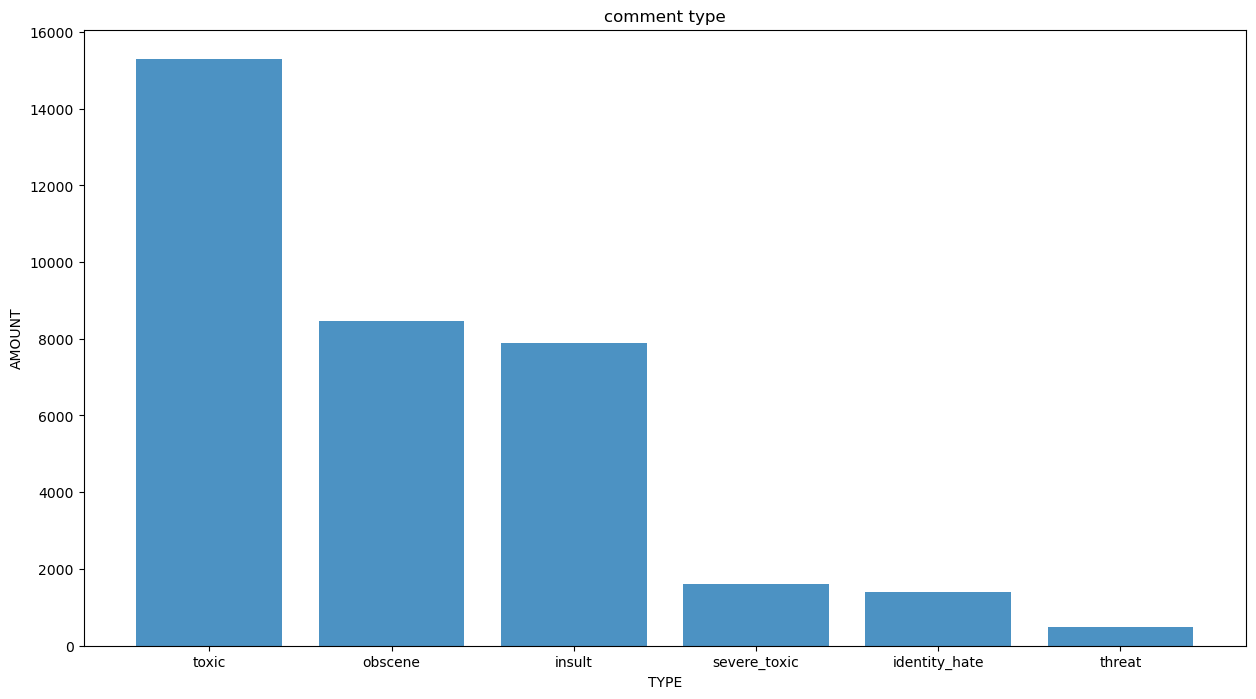

In [17]:
# visualising the data
ls=sent_grp.sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.bar(ls.index,ls.values,alpha=0.8)
plt.title('comment type')
plt.xlabel('TYPE')
plt.ylabel('AMOUNT')
plt.show()

In [18]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [19]:
# removing special characters

import re 
import string

In [20]:
alphanumeric=lambda x:re.sub('\w*\d\w*','',x)
pun_lower=lambda x:re.sub('[%s]' % re.escape(string.punctuation),'',x.lower())
remove_n=lambda x:re.sub('\n','',x)
remove_non_ascii=lambda x:re.sub(r'[^\x00-\x7f]',r'',x)
df['comment_text']=df['comment_text'].map(alphanumeric).map(pun_lower).map(remove_n).map(remove_non_ascii)

In [21]:
# creating seperate dataframes for each comment type

insult_df=df.loc[:,['id','comment_text','insult']]
toxic_df=df.loc[:,['id','comment_text','toxic']]
obscene_df=df.loc[:,['id','comment_text','obscene']]
severe_toxic_df=df.loc[:,['id','comment_text','severe_toxic']]
identity_hate_df=df.loc[:,['id','comment_text','identity_hate']]
threat_df=df.loc[:,['id','comment_text','threat']]

In [27]:
toxic_df

,id,comment_text,toxic
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [24]:
severe_toxic_df

,id,comment_text,severe_toxic
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [26]:
obscene_df

,id,comment_text,obscene
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [22]:
threat_df

,id,comment_text,threat
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [28]:
insult_df

,id,comment_text,insult
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [23]:
identity_hate_df

,id,comment_text,identity_hate
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0
3,0001b41b1c6bb37e,morei cant make any real suggestions on improv...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [29]:
# image visualization of toxic words from each datasets
from wordcloud import WordCloud,ImageColorGenerator
def wordcloud(df,label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color='black')
    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis('off')
    plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)

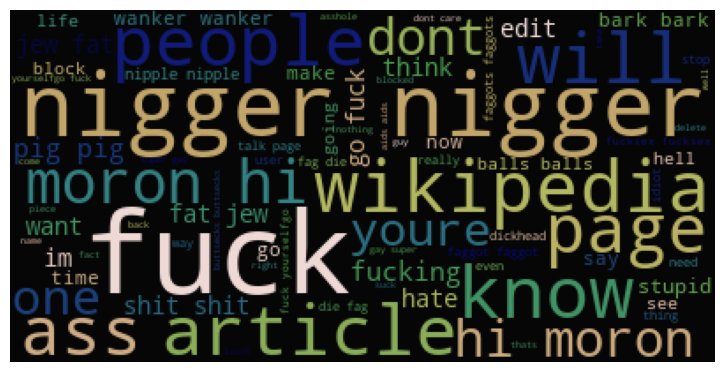

In [32]:
wordcloud(toxic_df,'toxic')

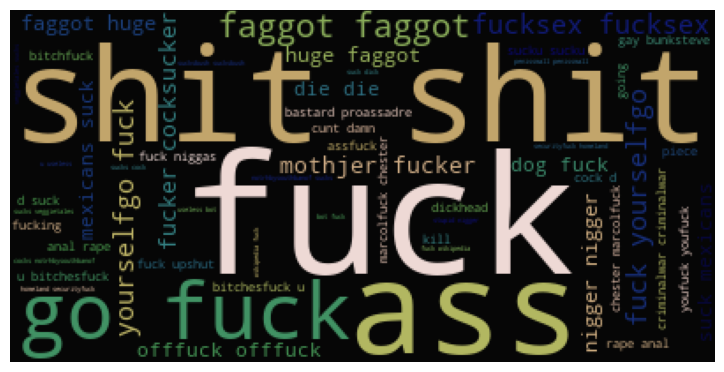

In [33]:
wordcloud(severe_toxic_df,'severe_toxic')

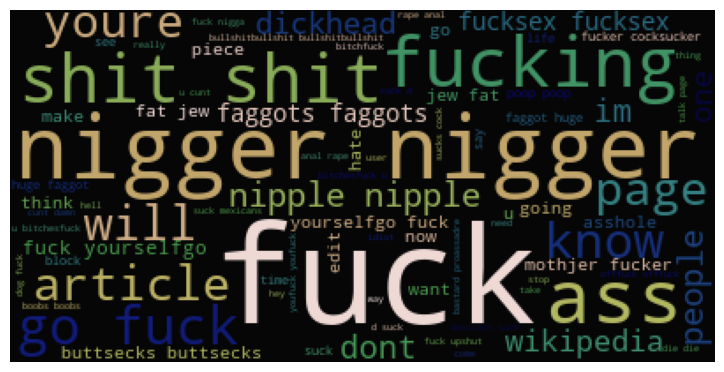

In [30]:
wordcloud(obscene_df,'obscene')

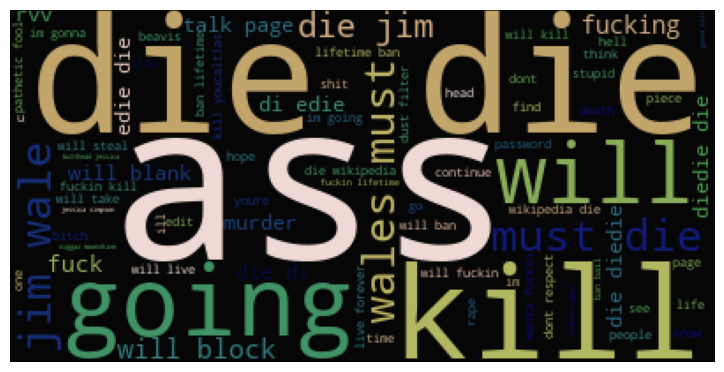

In [37]:
wordcloud(threat_df,'threat')

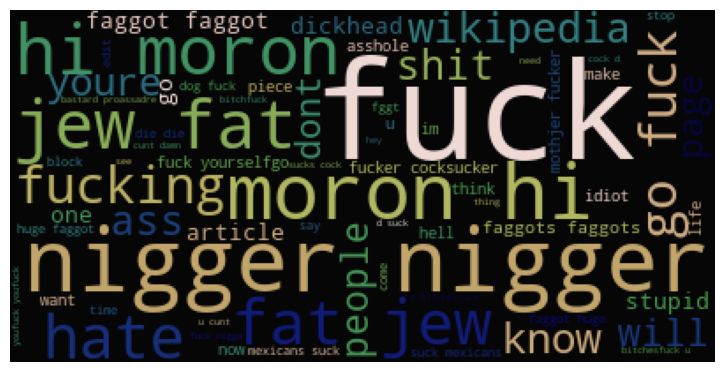

In [31]:
wordcloud(insult_df,'insult')

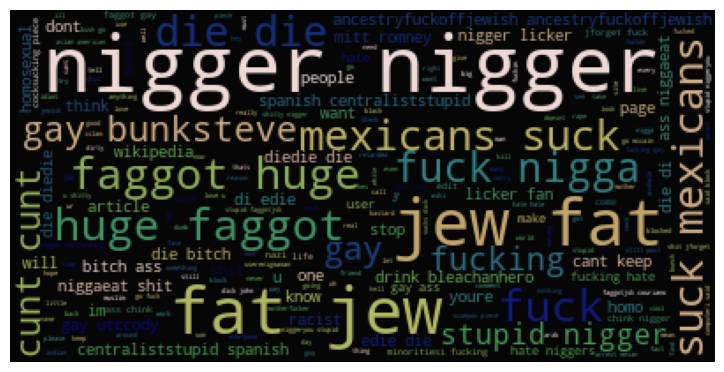

In [34]:
wordcloud(identity_hate_df,'identity_hate')

In [42]:
#balancing the toxic and non toxic comments in each datasets

In [48]:
# toxic
toxic_df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [49]:
toxic_df_1=toxic_df[toxic_df['toxic']==1].iloc[0:5000,:]
toxic_df_0=toxic_df[toxic_df['toxic']==0].iloc[0:5000,:]

In [50]:
toxic_df_balanced=pd.concat([toxic_df_1,toxic_df_0])

In [54]:
toxic_df_balanced['toxic'].value_counts()

toxic
1    5000
0    5000
Name: count, dtype: int64

In [55]:
# obscene
obscene_df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [56]:
obscene_df_1=obscene_df[obscene_df['obscene']==1].iloc[0:5000,:]
obscene_df_0=obscene_df[obscene_df['obscene']==0].iloc[0:5000,:]

In [57]:
obscene_df_balanced=pd.concat([obscene_df_1,obscene_df_0])
obscene_df_balanced['obscene'].value_counts()

obscene
1    5000
0    5000
Name: count, dtype: int64

In [58]:
obscene_df_0.shape

(5000, 3)

In [59]:
# severe
severe_toxic_df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [60]:
severe_toxic_df_1=severe_toxic_df[severe_toxic_df['severe_toxic']==1].iloc[0:1595,:]
severe_toxic_df_0=severe_toxic_df[severe_toxic_df['severe_toxic']==0].iloc[0:1595,:]

In [61]:
severe_toxic_df_balanced=pd.concat([severe_toxic_df_1,severe_toxic_df_0])
severe_toxic_df_balanced['severe_toxic'].value_counts()

severe_toxic
1    1595
0    1595
Name: count, dtype: int64

In [62]:
# threat
threat_df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [63]:
threat_df_1=threat_df[threat_df['threat']==1].iloc[0:478,:]
threat_df_0=threat_df[threat_df['threat']==0].iloc[0:478,:]

In [64]:
threat_df_balanced=pd.concat([threat_df_1,threat_df_0])
threat_df_balanced['threat'].value_counts()

threat
1    478
0    478
Name: count, dtype: int64

In [65]:
# identity hate
identity_hate_df['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [66]:
identity_hate_df_1=identity_hate_df[identity_hate_df['identity_hate']==1].iloc[0:1405,:]
identity_hate_df_0=identity_hate_df[identity_hate_df['identity_hate']==0].iloc[0:1405,:]
identity_hate_df_balanced=pd.concat([identity_hate_df_1,identity_hate_df_0])
identity_hate_df_balanced['identity_hate'].value_counts()

identity_hate
1    1405
0    1405
Name: count, dtype: int64

In [67]:
# insult
insult_df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [68]:
insult_df_1=insult_df[insult_df['insult']==1].iloc[0:5000,:]
insult_df_0=insult_df[insult_df['insult']==0].iloc[0:5000,:]
insult_df_balanced=pd.concat([insult_df_1,insult_df_0])
insult_df_balanced['insult'].value_counts()

insult
1    5000
0    5000
Name: count, dtype: int64

In [69]:
# machine learning

In [70]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [71]:
def model(dataf,lbl):
    # split the data
    x=dataf.comment_text
    y=dataf[lbl]

    # spliting into train and test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

    v=CountVectorizer()

    x_train_v=v.fit_transform(x_train.values)
    x_test_v=v.transform(x_test.values)

    # machine learning models
    lr=LogisticRegression()
    lr.fit(x_train_v,y_train)

    mnb=MultinomialNB()
    mnb.fit(x_train_v,y_train)

    svm=SVC()
    svm.fit(x_train_v,y_train)

    rfc=RandomForestClassifier()
    rfc.fit(x_train_v,y_train)

    # score
    f1_score_data={ 'F1 Score':[ f1_score(lr.predict(x_test_v),y_test),f1_score(mnb.predict(x_test_v),y_test),
                           f1_score(svm.predict(x_test_v),y_test),f1_score(rfc.predict(x_test_v),y_test)]}
    
    # saving scores in dataframe
    df_score=pd.DataFrame(f1_score_data,index=['LogisticReg','MultinomialNB','SVC','RandomForestClassifier'])
    
    return df_score

In [72]:
# evaluating the data

In [73]:
# toxic_comments
toxic_df_balanced_cv=model(toxic_df_balanced,'toxic')
toxic_df_balanced_cv

,F1 Score
LogisticReg,0.869742
MultinomialNB,0.854130
SVC,0.771930
RandomForestClassifier,0.802888


In [75]:
# severe_comments
severe_toxic_df_balanced_cv=model(severe_toxic_df_balanced,'severe_toxic')
severe_toxic_df_balanced_cv

,F1 Score
LogisticReg,0.930777
MultinomialNB,0.914097
SVC,0.769754
RandomForestClassifier,0.906414


In [74]:
# obscene_comments
obscene_df_balanced_cv=model(obscene_df_balanced,'obscene')
obscene_df_balanced_cv

,F1 Score
LogisticReg,0.903734
MultinomialNB,0.874915
SVC,0.807007
RandomForestClassifier,0.861997


In [76]:
# threat_comments
threat_df_balanced_cv=model(threat_df_balanced,'threat')
threat_df_balanced_cv

,F1 Score
LogisticReg,0.913043
MultinomialNB,0.899628
SVC,0.782090
RandomForestClassifier,0.869565


In [78]:
# insult_comments
insult_df_balanced
insult_df_balanced_cv=model(insult_df_balanced,'insult')
insult_df_balanced_cv

,F1 Score
LogisticReg,0.906401
MultinomialNB,0.878809
SVC,0.817731
RandomForestClassifier,0.850338


In [77]:
# identity_comments
identity_hate_df_balanced_cv=model(identity_hate_df_balanced,'identity_hate')
identity_hate_df_balanced_cv

,F1 Score
LogisticReg,0.901580
MultinomialNB,0.860051
SVC,0.755424
RandomForestClassifier,0.831403


In [79]:
# testing (toxicity) with examples

In [80]:
X=toxic_df_balanced.comment_text
Y=toxic_df_balanced['toxic']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
toxic_rf=RandomForestClassifier(n_estimators=100,random_state=50)
toxic_rf.fit(X_train_v,Y_train)
toxic_rf.predict(X_test_v)

array([0, 0, 1, ..., 0, 1, 0])

In [81]:
cmt1=['i killed an insect and ate it']
cmt1_v=v.transform(cmt1)
toxic_rf.predict_proba(cmt1_v)[:,1]
# 49 % toxic

array([0.491])

In [83]:
cmt2=['i hate you']
cmt2_v=v.transform(cmt2)
toxic_rf.predict_proba(cmt2_v)[:,1]
# 99 % toxic

array([0.99])

In [97]:
# testing (severe toxic hate) comments

In [207]:
X=severe_toxic_df_balanced.comment_text
Y=severe_toxic_df_balanced['severe_toxic']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
st_rf=RandomForestClassifier(n_estimators=100,random_state=50)
st_rf.fit(X_train_v,Y_train)
st_rf.predict(X_test_v)

array([0, 1, 1, ..., 1, 0, 1])

In [215]:
cmt1=["You, sir, are my hero. Any chance you remember what page that's on?"]
cmt1_v=v.transform(cmt1)
st_rf.predict_proba(cmt1_v)[:,1]
# 28% severe toxic

array([0.28])

In [217]:
cmt2=["Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!"]
cmt2_v=v.transform(cmt2)
st_rf.predict_proba(cmt2_v)[:,1]
# 93 % severe toxic

array([0.93])

In [219]:
# testing (obscene hate) comments

In [223]:
X=obscene_df_balanced.comment_text
Y=obscene_df_balanced['obscene']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
ob_rf=RandomForestClassifier(n_estimators=100,random_state=50)
ob_rf.fit(X_train_v,Y_train)
ob_rf.predict(X_test_v)

array([0, 1, 0, ..., 1, 1, 0])

In [225]:
cmt1=["You are gay or antisemmitian? "]
cmt1_v=v.transform(cmt1)
ob_rf.predict_proba(cmt1_v)[:,1]
# 78% obscene

array([0.78])

In [229]:
cmt2=["D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"]
cmt2_v=v.transform(cmt2)
ob_rf.predict_proba(cmt2_v)[:,1]
# 5 % obscene

array([0.05])

In [231]:
# testing threat comments

In [237]:
X=threat_df_balanced.comment_text
Y=threat_df_balanced['threat']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
threat_rf=RandomForestClassifier(n_estimators=100,random_state=50)
threat_rf.fit(X_train_v,Y_train)
threat_rf.predict(X_test_v)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [239]:
cmt1=["hi"]
cmt1_v=v.transform(cmt1)
threat_rf.predict_proba(cmt1_v)[:,1]
# 21% threat

array([0.21])

In [243]:
cmt2=[" HOW DARE YOU REVERT MY EDITS????"]
cmt2_v=v.transform(cmt2)
threat_rf.predict_proba(cmt2_v)[:,1]
# 53% threat

array([0.53])

In [245]:
# testing insult comments

In [251]:
X=insult_df_balanced.comment_text
Y=insult_df_balanced['insult']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
insult_rf=RandomForestClassifier(n_estimators=100,random_state=50)
insult_rf.fit(X_train_v,Y_train)
insult_rf.predict(X_test_v)

array([0, 0, 1, ..., 1, 1, 0])

In [255]:
cmt1=["Would you both shut up"]
cmt1_v=v.transform(cmt1)
insult_rf.predict_proba(cmt1_v)[:,1]
# 72% insult

array([0.72])

In [171]:
# testing (identity hate) comments

In [173]:
X=identity_hate_df_balanced.comment_text
Y=identity_hate_df_balanced['identity_hate']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
v=CountVectorizer()
X_train_v=v.fit_transform(X_train)
X_test_v=v.transform(X_test)
identity_rf=RandomForestClassifier(n_estimators=100,random_state=50)
identity_rf.fit(X_train_v,Y_train)
identity_rf.predict(X_test_v)

array([1, 1, 0, ..., 0, 0, 0])

In [160]:
cmt1=['The Alpha version had multiplayer. The Beta version did not.']
cmt1_v=v.transform(cmt1)
identity_rf.predict_proba(cmt1_v)[:,1]
# 12 % identity threat

array([0.12])

In [163]:
cmt2=['A pair of jew-hating weiner nazi schmucks.']
cmt2_v=v.transform(cmt2)
identity_rf.predict_proba(cmt2_v)[:,1]
# 84 % identity threat

array([0.84])